In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker

from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from wordcloud import WordCloud

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [4]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
#bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

In [5]:
#Merge BB100 with Features
bb100_f = pd.merge(bb100, features, on='SongID', how='left')

In [6]:
#Getting Data From The 60's, 70's, 80's, 90's, 00's, 10's
bb60s_f = bb100_f[(bb100_f['WeekID'] >= '1960-1-1') & (bb100_f['WeekID'] < '1970-1-1')]
bb70s_f = bb100_f[(bb100_f['WeekID'] >= '1970-1-1') & (bb100_f['WeekID'] < '1980-1-1')]
bb80s_f = bb100_f[(bb100_f['WeekID'] >= '1980-1-1') & (bb100_f['WeekID'] < '1990-1-1')]
bb90s_f = bb100_f[(bb100_f['WeekID'] >= '1990-1-1') & (bb100_f['WeekID'] < '2000-1-1')]
bb2000s_f = bb100_f[(bb100_f['WeekID'] >= '2000-1-1') & (bb100_f['WeekID'] < '2010-1-1')]
bb2010s_f = bb100_f[(bb100_f['WeekID'] >= '2010-1-1') & (bb100_f['WeekID'] < '2020-1-1')]

In [7]:
#Convert "Spotify Genres" from Desired Dataframe to a Dict with Frequency Counter & Sorted List

def genre_df_to_dict_counter(df_column):
    
    clean_series = df_column.replace('[]', np.nan).dropna()
    
    new = []
    for item in clean_series:
        for ch in ['\\','`','*','_','{','}','[',']','(',')'
                   ,'>','#','+','.','!','$','\'']:

            if ch in item:
                item = item.replace(ch,'')
        new.append(item)
    
    messy_string = ', '.join(new)
    
    clean_string = [item.strip() for item in messy_string.split(',')]
    dict_counter = {k:clean_string.count(k) for k in set(clean_string)}
    sorted_list = sorted(dict_counter.items(), key=lambda x: x[1], reverse=True)
    
    return dict_counter, sorted_list;

In [8]:
#Create a WordCloud from Dictionary Frequency


def dict_counter_to_WC(dc_counter, mask=None):
    
    from PIL import Image
    
    # WordCloud Object
    wordcloud = WordCloud(max_words=75, 
                          contour_width=3,
                          max_font_size = 70,
                          width=1000, height=1000,
                          background_color="white",
                          colormap='seismic',
                          prefer_horizontal=0.75,
                          mask=mask
                         )
    
    # Generate a word cloud
    wordcloud.generate_from_frequencies(dc_counter)
    
    #Save it locally
    wordcloud.to_file('80s_WC_with_Image.png')

    # Visualize the word cloud
    # print (wordcloud.words_)
    # print(wordcloud.layout_)
    return wordcloud.to_image()

In [9]:
#First Remove BG using Background Burner then...
#Convert image with no background to RGB format for WordCloud

from PIL import Image
  
def convertImage():
    img = Image.open("guitar.png")
    img = img.convert("RGBA")
  
    datas = img.getdata()
  
    newData = []
  
    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
  
    img.putdata(newData)
    img.save("./New_Guitar.png", "PNG")
    print("Successful")
  
convertImage()

Successful


In [10]:
#Use new image as Mask
Guitar_mask = np.array(Image.open("New_Guitar.png"))

In [11]:
#Check the 255's
Guitar_mask[0:3]

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [ 10,   9,   7, 255],
        [  5,   5,   3, 255],
        [ 10,   9,   8, 255]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [  7,   6,   4, 255],
        [  7,   6,   5, 255],
        [  8,   7,   5, 255]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [  7,   6,   4, 255],
        [  5,   4,   2, 255],
        [ 14,  12,   9, 255]]], dtype=uint8)

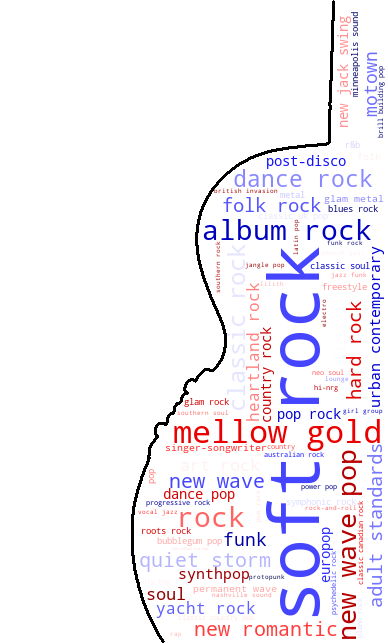

In [12]:
dc80s, sl80s = genre_df_to_dict_counter(bb80s_f['spotify_genre'])
#sl80s
dict_counter_to_WC(dc80s,mask=Guitar_mask)

In [13]:
sl80s

[('soft rock', 21973),
 ('mellow gold', 19761),
 ('rock', 15236),
 ('album rock', 14993),
 ('new wave pop', 13901),
 ('classic rock', 10633),
 ('dance rock', 9609),
 ('new romantic', 7431),
 ('quiet storm', 7115),
 ('new wave', 6944),
 ('disco', 6741),
 ('folk rock', 6200),
 ('hard rock', 5969),
 ('adult standards', 5828),
 ('funk', 5304),
 ('motown', 5171),
 ('art rock', 4616),
 ('soul', 4499),
 ('yacht rock', 4150),
 ('heartland rock', 4057),
 ('urban contemporary', 3692),
 ('synthpop', 3608),
 ('europop', 3350),
 ('post-disco', 3323),
 ('pop rock', 3283),
 ('dance pop', 3190),
 ('country rock', 3071),
 ('new jack swing', 3068),
 ('permanent wave', 2765),
 ('singer-songwriter', 2554),
 ('folk', 2553),
 ('glam metal', 2504),
 ('r&b', 1976),
 ('roots rock', 1901),
 ('bubblegum pop', 1851),
 ('freestyle', 1685),
 ('symphonic rock', 1642),
 ('classic uk pop', 1555),
 ('pop', 1417),
 ('metal', 1362),
 ('minneapolis sound', 1353),
 ('classic soul', 1268),
 ('blues rock', 1143),
 ('glam roc